Enter the path to your image (e.g., 'image.jpg'):  travis-chen-rbHAnOL5oto-unsplash.jpg


Image loaded successfully!


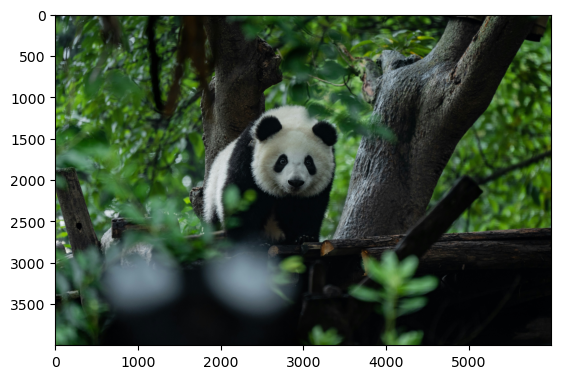


=== Image Editing Menu ===
1. Show Image
2. Resize Image
3. Rotate Image
4. Remove Background
5. Convert to Grayscale
6. Adjust Brightness
7. Apply Blur Filter
8. Crop Image
9. Flip Image
10. Save Image
11. Exit


Enter your choice (1-11):  9
Enter flip direction (horizontal/vertical):  horizontal


Image flipped horizontal!


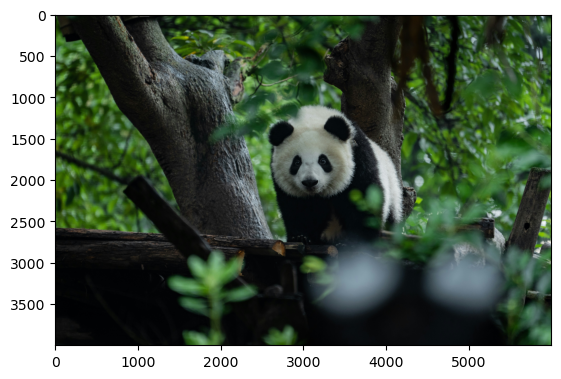


=== Image Editing Menu ===
1. Show Image
2. Resize Image
3. Rotate Image
4. Remove Background
5. Convert to Grayscale
6. Adjust Brightness
7. Apply Blur Filter
8. Crop Image
9. Flip Image
10. Save Image
11. Exit


Enter your choice (1-11):  8


Image dimensions: width=6000, height=4000


Enter left coordinate (0 to 6000):  200
Enter upper coordinate (0 to 4000):  500
Enter right coordinate (200 to 6000):  800
Enter lower coordinate (500 to 4000):  1000


Image cropped!


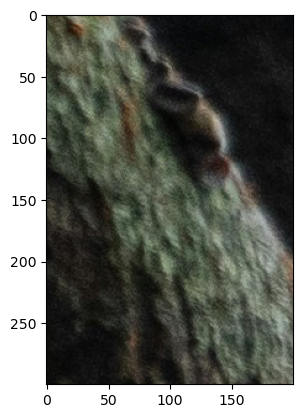


=== Image Editing Menu ===
1. Show Image
2. Resize Image
3. Rotate Image
4. Remove Background
5. Convert to Grayscale
6. Adjust Brightness
7. Apply Blur Filter
8. Crop Image
9. Flip Image
10. Save Image
11. Exit


Enter your choice (1-11):  11


Exiting program. Goodbye!


In [30]:
import os
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from rembg import remove
import numpy as np


def show_image(img):
    img_array = np.array(img)
    # Display the image
    plt.imshow(img_array)
    plt.show()


def resize_image(img, width, height):
    return img.resize((width, height), Image.Resampling.LANCZOS)


def rotate_image(img, angle):
    return img.rotate(angle, expand=True)


def remove_background(img):
    img_array = np.array(img)
    output = remove(img_array)
    return Image.fromarray(output)


def convert_to_grayscale(img):
    return img.convert("L").convert("RGB")


def adjust_brightness(img, factor):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)


def apply_blur(img, radius=2):
    return img.filter(ImageFilter.GaussianBlur(radius))


def crop_image(img, left, upper, right, lower):
    img_array = np.array(img)
    cropped_img = img_array[left:upper, right:lower]
    return crop_image


def flip_image(img, direction="horizontal"):
    if direction.lower() == "horizontal":
        return img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    elif direction.lower() == "vertical":
        return img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    return img


def main():
    image_path = input("Enter the path to your image (e.g., 'image.jpg'): ")
    if not os.path.exists(image_path):
        print("Image file not found! Using a placeholder image.")
        img = Image.new("RGB", (500, 500), color="blue")
    else:
        img = Image.open(image_path).convert("RGB")

    print("Image loaded successfully!")
    show_image(img)

    while True:
        print("\n=== Image Editing Menu ===")
        print("1. Show Image")
        print("2. Resize Image")
        print("3. Rotate Image")
        print("4. Remove Background")
        print("5. Convert to Grayscale")
        print("6. Adjust Brightness")
        print("7. Apply Blur Filter")
        print("8. Crop Image")
        print("9. Flip Image")
        print("10. Save Image")
        print("11. Exit")
        
        choice = input("Enter your choice (1-11): ")

        try:
            choice = int(choice)
        except ValueError:
            print("Invalid input! Please enter a number between 1 and 11.")
            continue

        if choice == 1:
            show_image(img)

        elif choice == 2:
            width = int(input("Enter new width (e.g., 300): "))
            height = int(input("Enter new height (e.g., 300): "))
            img = resize_image(img, width, height)
            print("Image resized!")
            show_image(img)

        elif choice == 3:
            angle = float(input("Enter rotation angle in degrees (e.g., 90): "))
            img = rotate_image(img, angle)
            print("Image rotated!")
            show_image(img)

        elif choice == 4:
            try:
                img = remove_background(img)
                print("Background removed!")
                show_image(img)
            except Exception as e:
                print(f"Error removing background: {e}")

        elif choice == 5:
            img = convert_to_grayscale(img)
            print("Converted to grayscale!")
            show_image(img)

        elif choice == 6:
            factor = float(input("Enter brightness factor (e.g., 1.5 to increase, 0.5 to decrease): "))
            img = adjust_brightness(img, factor)
            print("Brightness adjusted!")
            show_image(img)

        elif choice == 7:
            radius = float(input("Enter blur radius (e.g., 2): "))
            img = apply_blur(img, radius)
            print("Blur filter applied!")
            show_image(img)

        elif choice == 8:
            width, height = img.size
            print(f"Image dimensions: width={width}, height={height}")
            left = int(input(f"Enter left coordinate (0 to {width}): "))
            upper = int(input(f"Enter upper coordinate (0 to {height}): "))
            right = int(input(f"Enter right coordinate ({left} to {width}): "))
            lower = int(input(f"Enter lower coordinate ({upper} to {height}): "))
            img = crop_image(img, left, upper, right, lower)
            print("Image cropped!")
            show_image(img)

        elif choice == 9:
            direction = input("Enter flip direction (horizontal/vertical): ")
            img = flip_image(img, direction)
            print(f"Image flipped {direction}!")
            show_image(img)

        elif choice == 10:
            save_path = input("Enter path to save the image (e.g., 'edited_image.jpg'): ")
            img.save(save_path)
            print(f"Image saved to {save_path}!")

        elif choice == 11:
            print("Exiting program. Goodbye!")
            break

        else:
            print("Invalid choice! Please select a number between 1 and 11.")

if __name__ == "__main__":
    main()